In [62]:
# realign index afer removing above row
# otherwise this created an error for Jenkspy below
citations.reset_index(drop=True, inplace=True)

In [63]:
# create breaks in contractor_100K_count
breaks = jenkspy.jenks_breaks(citations.cited_person_age, nb_class=3)

In [64]:
breaks

[18.0, 34.0, 53.0, 99.0]

In [65]:
citations['age_bins'] = pd.cut(citations.cited_person_age,
                        bins=breaks,
                        include_lowest=True)

In [69]:
citations.age_bins.cat.codes.value_counts()

0    29676
1    17382
2     9378
dtype: int64

In [105]:
# adjust min_samples parameter

min_samples = []
cluster_count_min_samples = []

for i in range(1,11,1):
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=1, min_samples=i)
    min_samples.append(i)
    
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    cluster_count_min_samples.append(len(set(clusters)) - (1 if -1 in clusters else 0))
    
cluster_count_min_samples

[14, 6, 5, 4, 6, 6, 6, 6, 4, 2]

As min_samples increases cluster count decreases.

In [106]:
# adjust eps parameter

eps = []
cluster_count_eps = []
eps_ari = []
eps_sil = []

for i in range(1,11,1):
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=i, min_samples=1)
    eps.append(i)
    
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    cluster_count_eps.append(len(set(clusters)) - (1 if -1 in clusters else 0))
    eps_ari.append(metrics.adjusted_rand_score(y, clusters))
    eps_sil.append(metrics.silhouette_score(X_std, clusters, metric='euclidean'))
    
cluster_count_eps

[14, 6, 2, 2, 2, 2, 2, 2, 2, 2]

As eps increases, cluster count decreases.  However it never goes below 1.

In [107]:
# combine results
pd.DataFrame(data= {'min_samples': cluster_count_min_samples,
                      'eps': cluster_count_eps},
            index=range(1,11,1))

,min_samples,eps
1,14,14
2,6,6
3,5,2
4,4,2
5,6,2
6,6,2
7,6,2
8,6,2
9,4,2
10,2,2


Text(0, 0.5, 'Clusters')

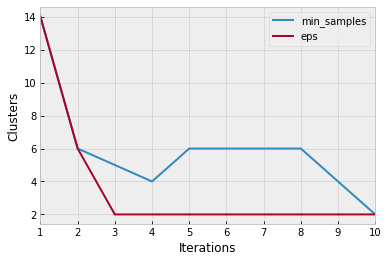

In [108]:
pd.DataFrame(data= {'min_samples': cluster_count_min_samples,
                      'eps': cluster_count_eps},
            index=range(1,11,1)).plot()
plt.xlabel('Iterations')
plt.ylabel('Clusters')

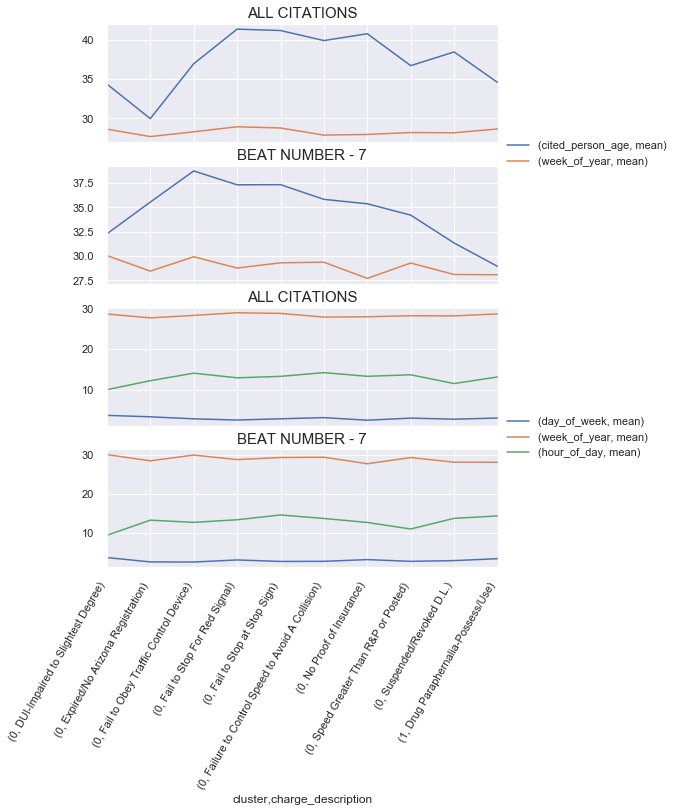

In [141]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, ncols=1, sharey=False, sharex=True, figsize=(7, 10))

df.drop('beat', axis=1).groupby(['charge_description']).agg(['mean']).loc[:,['week_of_year', 'cited_person_age']].plot(ax=ax0, legend=False)
ax0.set_title('ALL CITATIONS', fontsize=15)

beat_number_labels.groupby(['cluster', 'charge_description']).agg(['mean']).loc[:,['week_of_year', 'cited_person_age']].plot(ax=ax1, legend=False)
ax1.set_title('BEAT NUMBER - ' + str(beat_number), fontsize=15)

ax1.legend(loc='center left', bbox_to_anchor=(1.0, 1.1))





df.drop('beat', axis=1).groupby(['charge_description']).agg(['mean']).loc[:,['week_of_year', 'day_of_week', 'hour_of_day']].plot(ax=ax2, legend=False)
ax2.set_title('ALL CITATIONS', fontsize=15)

# ax2.tick_params(labelrotation=60, labelleft=True)
    
#     rotation=45, horizontalalignment="right")


beat_number_labels.groupby(['cluster', 'charge_description']).agg(['mean']).loc[:,['week_of_year', 'day_of_week', 'hour_of_day']].plot(ax=ax3)
ax3.set_title('BEAT NUMBER - ' + str(beat_number), fontsize=15)

ax3.legend(loc='center left', bbox_to_anchor=(1.0, 1.1))


plt.xticks(rotation=60, horizontalalignment="right");
# plt.xlabel('CHARGE DESCRIPTION', fontsize=13);

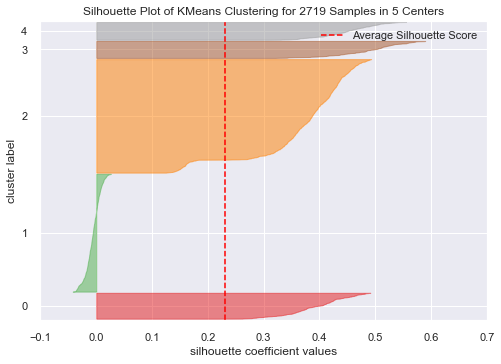

In [147]:
# model = DBSCAN(eps=5, min_samples=5)

km = KMeans(n_clusters=5)


SilhouetteVisualizer(km).fit(X_std).poof()


# model.fit(X_std, y=clusters)
# model.show()
